<a href="https://colab.research.google.com/github/DITHAAAA/Final-Project-3_Python-For-Data-Science/blob/main/PYTN_KampusMerdeka_fp3_Ditha_Tul_Nugraha_(Group2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT 3**

Group 2

1.   Farizza Fikri Mumtaza (PYTN-KS20-03)
2.   Ilham Yusuf (PYTN-KS20-06)
3.   Ditha Tul Nugraha (PYTN-KS20-015)

# **A. Introduce**

Dataset heart_failure_clinical_records_dataset adalah kumpulan data yang berkaitan dengan rekam medis pasien yang mengalami gagal jantung. Umumnya, dataset semacam ini berisi berbagai atribut atau fitur yang mencakup informasi klinis dan demografis tentang pasien, serta hasil uji atau pengukuran medis yang relevan.

Dataset ini memiliki 13 atribut:

1.   Age: umur pasien
2.   Anemia: apakah ada pengurangan haemoglobin
3.   Creatinine_phosphokinase: level enzim CPK dalam mcg/L
4.   Diabetes: apakah pasien punya riwayat diabetes
5.   Ejection_fraction: presentase darah yang meninggalkan jantuung dalam presentasi di setiap kontraksi jantung
6.   High_blood_pressure: apakah pasien punya darah tinggi
7.   Platelets: jumlah plateletdi darah dalam kiloplatelets/mL
8.   Serum_creatinine: level serum sodium di darah dalam mg/dL
9.   Serum_sodium: level serum sodium di darah dalam mEq/L
10.  Sex: apakah pasien pria atau wanita
11.  Smoking: apakah pasien merokok
12.  Time: waktu dalam hari unntuk follow-up
13.  DEATH_EVENT: apakah pasien sudah meninggal saat waktu follow-up



# **B. Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

# **C. Load Data**

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [94]:
# Menampilkan data 5 baris pertama
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [95]:
# Melihat lebih jelas jumlah kolom dan baris
df.shape

(299, 13)

In [96]:
# Menampilkan info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# **D. Logistic Regression**

In [97]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Inisialisasi model logistic regression membuat objek model logistic regression. Menggunakan training set untuk melatih model menggunakan metode fit dan melakukan prediksi pada testing set Menggunakan model yang telah dilatih untuk membuat prediksi pada data uji.

In [99]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.8
Confusion Matrix:
[[34  1]
 [11 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60



Mengukur kinerja model menggunakan accuracy, confusion matrix, dan classification report. Dalam hasil evaluasi menampilkan hasil akurasi, confusion matrix, dan classification report untuk mengevaluasi kinerja model.


Penjelasan pada tampilan output adalah:
*   Accuracy: Akurasi model, yaitu persentase prediksi yang benar dari seluruh prediksi.
*   Confusion Matrix: Matriks yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas (0 dan 1). Diagonal utama adalah prediksi yang benar.
*   Classification Report: Laporan yang menyediakan precision, recall, dan f1-score untuk setiap kelas, bersama dengan rata-rata berbobot dan tanpa bobot. Precision mengukur seberapa baik model dalam mengidentifikasi positif, recall mengukur seberapa baik model dalam menemukan semua instance yang positif, dan f1-score adalah perpaduan dari keduanya.


# **E. K-Nearest Neighbors (KNN)**

In [ ]:
X = df.drop('smoking', axis=1)
y = df['smoking']

# Mengubah variabel kategorikal menjadi variabel dummy/indikator
X = pd.get_dummies(X)

# Standarisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Menggunakan StandardScaler untuk menormalkan atau standarisasi fitur-fitur agar memiliki skala yang serupa.

In [ ]:
# Memisahkan data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=3)

# Melatih model menggunakan training set
knn_model.fit(X_train, y_train)

# Melakukan prediksi pada testing set
y_pred = knn_model.predict(X_test)

Menggunakan train_test_split untuk membagi dataset menjadi data latih dan data uji. Dalam inisialisasi model K-Nearest Neighbors membuat objek model K-Nearest Neighbors dengan jumlah tetangga (n_neighbors) sebanyak 3. Menggunakan training set untuk melatih model menggunakan metode fit. Melakukan prediksi pada testing set menggunakan model yang telah dilatih untuk membuat prediksi pada data uji.

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.6166666666666667
Confusion Matrix:
[[27 12]
 [11 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        39
           1       0.45      0.48      0.47        21

    accuracy                           0.62        60
   macro avg       0.58      0.58      0.58        60
weighted avg       0.62      0.62      0.62        60



Mengukur kinerja model menggunakan accuracy, confusion matrix, dan classification report. Dalam hasil evaluasi menampilkan hasil akurasi, confusion matrix, dan classification report untuk mengevaluasi kinerja model.

# **F. Support Vector Machine**

In [ ]:
X = df.drop('sex', axis=1)
y = df['sex']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

Menggunakan StandardScaler untuk menormalkan atau standarisasi fitur-fitur agar memiliki skala yang serupa. Dalam inisialisasi model Support Vector Machine (SVM) membuat objek model SVM dengan kernel linear dan parameter C=1. Menggunakan training set untuk melatih model menggunakan metode fit dan melakukan prediksi pada testing set menggunakan model yang telah dilatih untuk membuat prediksi pada data uji.

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.7333333333333333
Confusion Matrix:
[[13  7]
 [ 9 31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62        20
           1       0.82      0.78      0.79        40

    accuracy                           0.73        60
   macro avg       0.70      0.71      0.71        60
weighted avg       0.74      0.73      0.74        60



Mengukur kinerja model dan menampilkan hasil menggunakan accuracy, confusion matrix, dan classification report, untukk mengevaluasi kinerja model.

# **G. Decision Tree**

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

Dalam inisialisasi model Decision Tree membuat objek model Decision Tree. Melatih model menggunakan training set untuk melatih model menggunakan metode 'fit'. Menggunakan model yang telah dilatih untuk membuat prediksi pada data uji. Serta evaluasi model yang mengukur kinerja model menggunakan accuracy, confusion matrix, dan classification report.

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.5166666666666667
Confusion Matrix:
[[18 14]
 [15 13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.56      0.55        32
           1       0.48      0.46      0.47        28

    accuracy                           0.52        60
   macro avg       0.51      0.51      0.51        60
weighted avg       0.52      0.52      0.52        60



Menampilkan hasil akurasi, confusion matrix, dan classification report untuk mengevaluasi kinerja model.

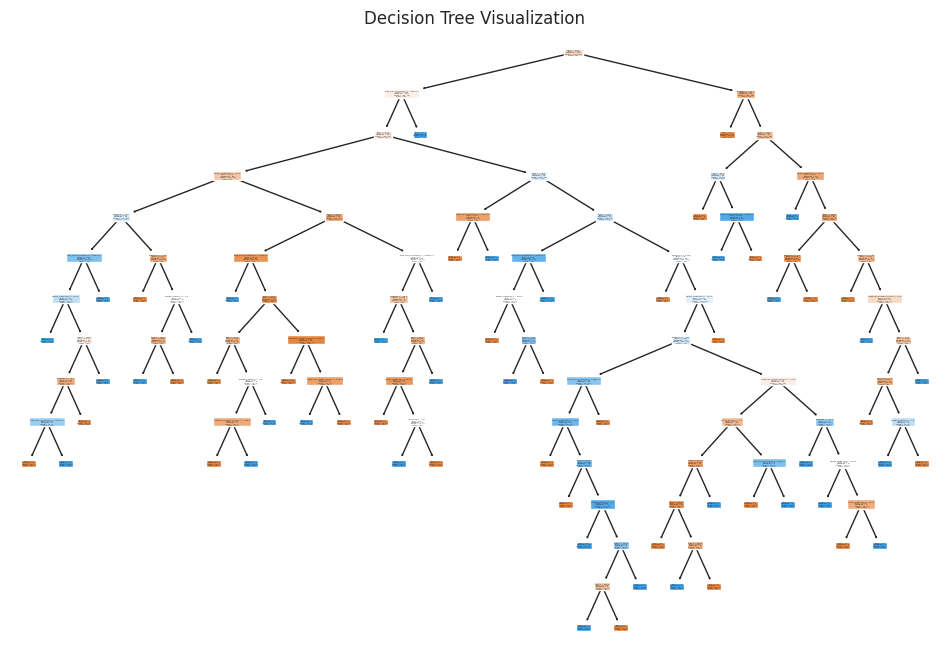

In [ ]:
# Visualisasi struktur Decision Tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title('Decision Tree Visualization')
plt.show()

Visualisasi struktur Decision Tree menggunakan tree.plot_tree dari scikit-learn dan matplotlib untuk memvisualisasikan struktur Decision Tree. Ini membantu untuk memahami cara model membuat keputusan berdasarkan fitur-fitur yang ada.

# **H. Random Forest**

In [ ]:
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Memisahkan dataset menjadi features (X) dan target variable (y), mengubah variabel kategorikal: Menggunakan pd.get_dummies untuk mengonversi variabel kategorikal menjadi variabel dummy dan memisahkan data menjadi training set dan testing set: Menggunakan train_test_split untuk membagi dataset menjadi data latih dan data uji.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

Dalam inisialisasi model Random Forest: membuat objek model Random Forest dengan 100 pohon (n_estimators=100) dan seed acak 42 (random_state=42), menggunakan training set untuk melatih model menggunakan metode 'fit'. Menggunakan model yang telah dilatih untuk membuat prediksi pada data uji dan mengukur kinerja model menggunakan accuracy, confusion matrix, dan classification report.

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.75
Confusion Matrix:
[[33  2]
 [13 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



Menampilkan hasil akurasi, confusion matrix, dan classification report untuk mengevaluasi kinerja model.

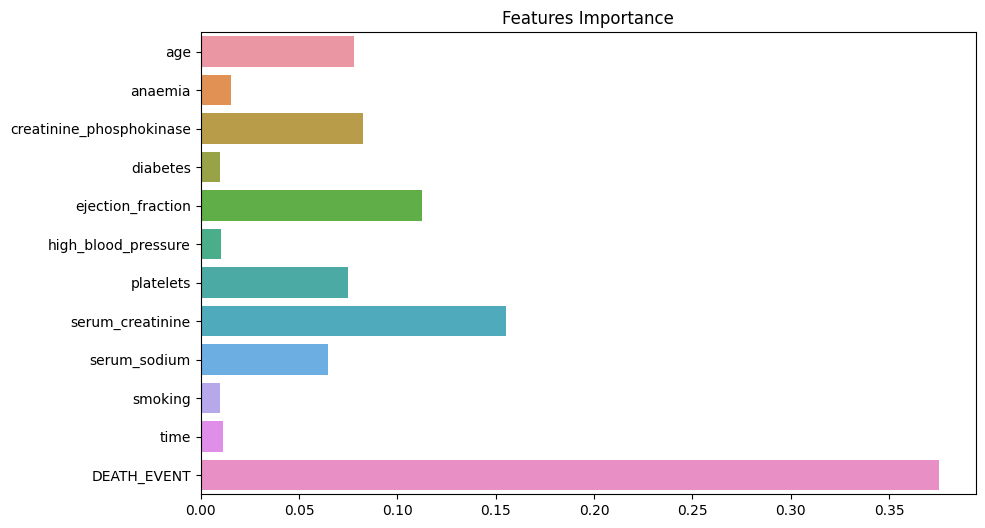

In [ ]:
# Visualisasi feature importance
feature_importance = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, orient='h')
plt.title('Features Importance')
plt.show()

Barplot menunjukkan tingkat pentingnya setiap fitur dalam membuat prediksi dan membantu mengidentifikasi fitur-fitur yang paling berpengaruh dalam model.

# **I. Naive Bayes**

In [ ]:
X = df.drop('high_blood_pressure', axis=1)
y = df['high_blood_pressure']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nb_model = GaussianNB()

nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

Naive Bayes adalah metode klasifikasi probabilistik yang bergantung pada asumsi independensi antara fitur-fitur. Dalam kasus ini, model Naive Bayes (Gaussian) digunakan untuk memprediksi tekanan darah tinggi (high_blood_pressure) berdasarkan fitur-fitur klinis dalam dataset

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.4666666666666667
Confusion Matrix:
[[16 23]
 [ 9 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.41      0.50        39
           1       0.34      0.57      0.43        21

    accuracy                           0.47        60
   macro avg       0.49      0.49      0.46        60
weighted avg       0.54      0.47      0.47        60



Hasil evaluasi model termasuk akurasi, matriks konfusi, dan laporan klasifikasi.

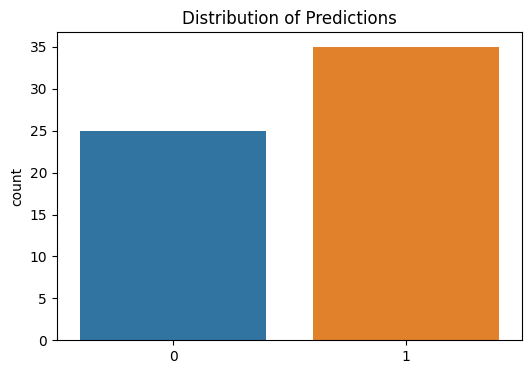

In [ ]:
# Visualisasi distribusi hasil prediksi
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred)
plt.title('Distribution of Predictions')
plt.show()

Grafik batang menunjukkan distribusi hasil prediksi (0 atau 1) pada data uji. Ini juga dapat membantu memahami sebaran prediksi yang dihasilkan oleh model Naive Bayes.

Naive Bayes adalah metode klasifikasi probabilistik yang berdasarkan asumsi bahwa setiap fitur independen satu sama lain. Model Naive Bayes, khususnya Gaussian Naive Bayes, cocok untuk data dengan asumsi distribusi normal. Project ini, menggunakan Gaussian Naive Bayes karena beberapa fitur numerik dalam dataset.

# **J. Confusion Matrix**

In [ ]:
X = df.drop('sex', axis=1)
y = df['sex']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

Membuat objek model Gaussian Naive Bayes (nb_model), melatih model menggunakan data training (X_train sebagai features dan y_train sebagai target variable). Model belajar dari distribusi probabilitas data training. Menggunakan model yang telah dilatih untuk membuat prediksi pada data testing (X_test) dan hasil prediksi disimpan dalam variabel y_pred. Menghitung Confusion Matrix menggunakan fungsi confusion_matrix dari scikit-learn. Confusion Matrix membandingkan nilai sebenarnya (y_test) dengan nilai prediksi (y_pred) untuk mengevaluasi performa model.

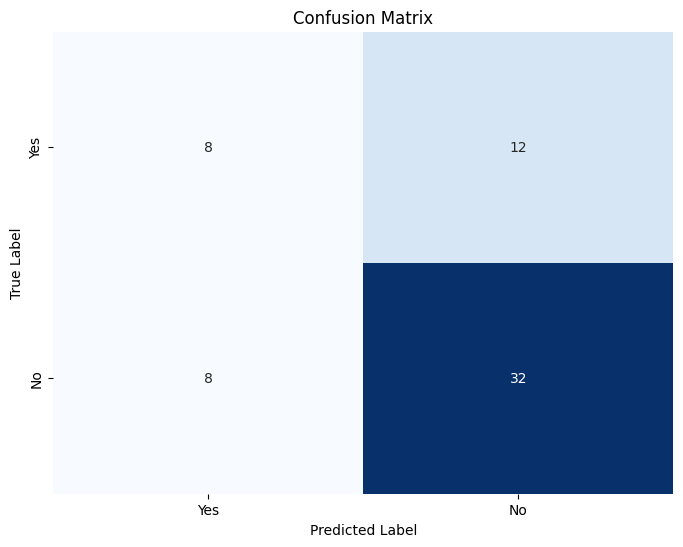

In [ ]:
# Menampilkan Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

*   Confusion Matrix adalah tabel yang menunjukkan performa model pada set data uji, membandingkan prediksi model dengan nilai sebenarnya.
*   Pada sumbu x (horizontal), terdapat kelas prediksi (Predicted: 'No', 'Yes'), dan pada sumbu y (vertikal), terdapat kelas aktual (Actual: 'No', 'Yes').
*   Angka di dalam sel menunjukkan jumlah data yang termasuk dalam kombinasi tertentu dari kelas aktual dan kelas prediksi.
*   Diagonal utama dari matriks adalah True Positives (TP) dan True Negatives (TN).
*   Angka di luar diagonal utama adalah False Positives (FP) dan False Negatives (FN).
*   Confusion Matrix membantu mengukur kinerja model dalam hal precision, recall, F1-score, dan lainnya.


Dengan menggunakan visualisasi Confusion Matrix, dapat dengan jelas melihat seberapa baik model yang digunakan dalam melakukan prediksi pada kelas positif dan negatif.

# **K. Visualization**

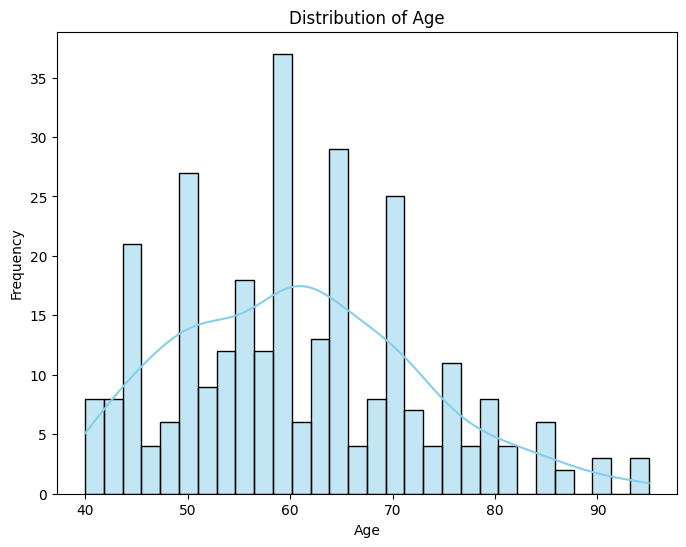

In [ ]:
# Visualisasi distribusi variabel 'age' menggunakan histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Histogram menunjukkan distribusi umur dalam dataset dan membantu memahami sebaran umur pasien dalam dataset.

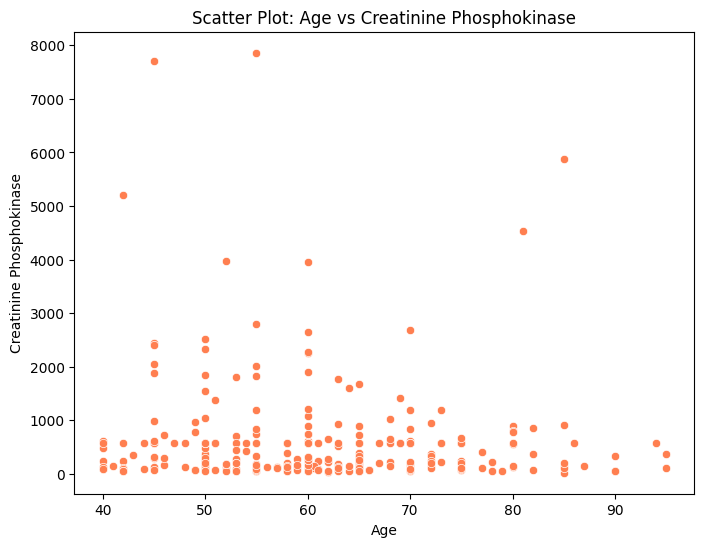

In [ ]:
# Visualisasi hubungan antara 'age' dan 'creatinine_phosphokinase' menggunakan scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='creatinine_phosphokinase', data=df, color='coral')
plt.title('Scatter Plot: Age vs Creatinine Phosphokinase')
plt.xlabel('Age')
plt.ylabel('Creatinine Phosphokinase')
plt.show()


Scatter plot menunjukkan hubungan antara variabel 'age' dan 'creatinine_phosphokinase'.

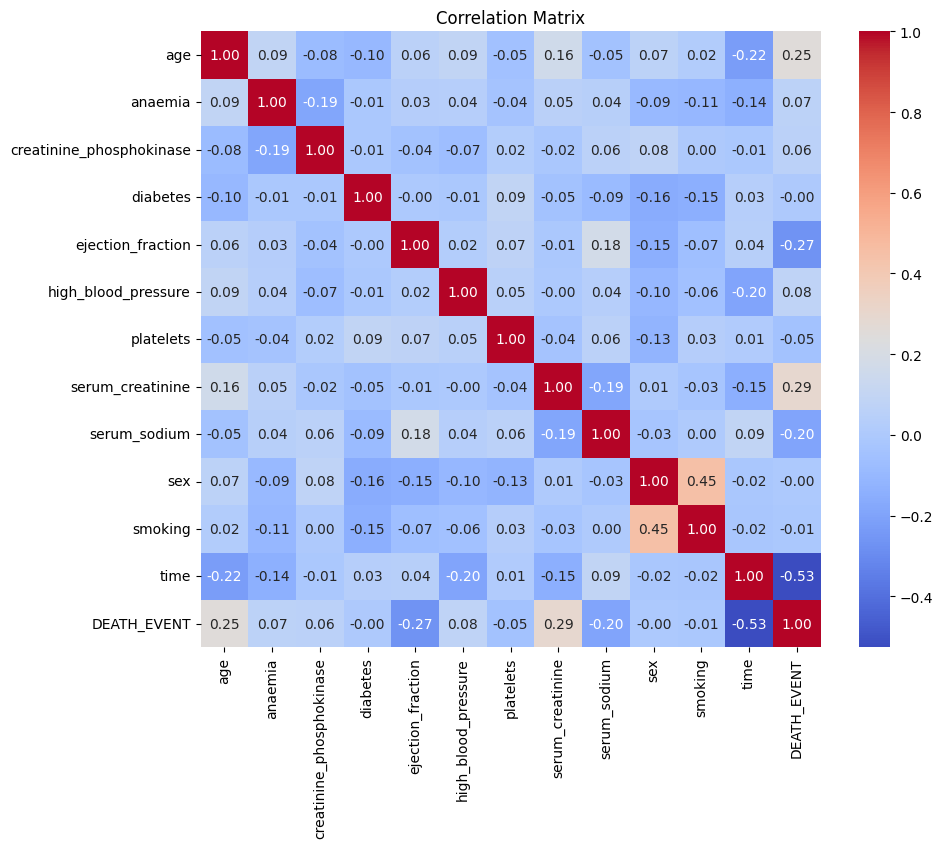

In [ ]:
# Visualisasi korelasi antara variabel numerik
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Korelasi Antar Variabel Numerik menggunakan Heatmap, matriks korelasi menunjukkan seberapa erat hubungan antara variabel numerik dalam dataset.

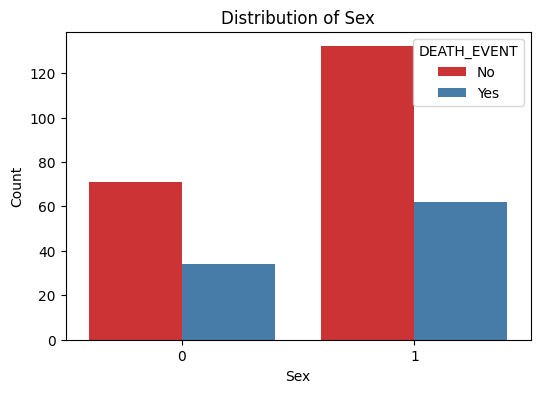

In [ ]:
# Visualisasi distribusi variabel Sex
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df, hue='DEATH_EVENT', palette='Set1')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['No', 'Yes'])
plt.show()

Grafik batang menunjukkan distribusi variabel jenis kelamin (Sex) dan seberapa banyak yang mengalami kejadian kematian atau tidak.

# **L. Kesimpulan**

*   Berbagai model telah diuji pada dataset kegagalan jantung.
*   Model Random Forest memiliki performa terbaik dengan akurasi 75%.
*   Pemilihan model dan tuning parameter (seperti k pada KNN) dapat memengaruhi performa.
*   Normalisasi fitur dan pemahaman terhadap karakteristik data membantu dalam memilih dan menyesuaikan model.
*   Analisis confusion matrix dan metrik evaluasi membantu memahami performa model pada setiap kelas.
*   Visualisasi dapat membantu interpretasi model, terutama pada data dengan jumlah fitur yang terbatas.
*   Evaluasi model menggunakan matriks konfusi, precision, recall, dan f1-score memberikan gambaran lengkap tentang performa model pada data uji.